# Homework 2
Linear Regression

In [28]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures

d = pd.read_csv('/content/drive/MyDrive/machine_learning/homework/hba1c_bloodGlucose_selected_use_train_test_0.5_seed_31.csv', index_col=0)

print(d)

         hba1c  rbg_scaled
169   8.555813    0.879085
93    6.972834    0.330065
246  10.594119    1.846405
4     5.187378    0.454248
99    7.077409    0.905229
194   9.216464    1.401961
115   7.427539    0.578431
46    6.125636    0.833333
183   8.908981    1.382353
215   9.728337    1.271242
130   7.868946    1.192810
220   9.859199    1.029412
192   9.188311    1.709150
214   9.700925    1.781046
158   8.380030    0.846405
193   9.215148    1.042484
179   8.819236    0.859477
217   9.787106    1.330065
146   8.118472    1.375817
258  11.222671    1.598039
189   9.083927    1.186275
40    6.006925    0.395425
2     5.173050    0.539216
256  11.120727    1.741830
236  10.299697    1.395425
171   8.598509    0.545752
196   9.319030    1.428105
145   8.117994    1.245098


##random number generator

In [29]:
np.random.seed(31)

data_fit, d_test = train_test_split(d, test_size = 0.5)
print("data_fit type", type(data_fit))
print("fit data shape", data_fit.shape, "test data shape", d_test.shape)
print(data_fit['hba1c'], '\n\n', d_test['hba1c'])

data_fit type <class 'pandas.core.frame.DataFrame'>
fit data shape (14, 2) test data shape (14, 2)
93      6.972834
192     9.188311
220     9.859199
217     9.787106
145     8.117994
2       5.173050
158     8.380030
130     7.868946
115     7.427539
196     9.319030
246    10.594119
179     8.819236
256    11.120727
146     8.118472
Name: hba1c, dtype: float64 

 215     9.728337
171     8.598509
193     9.215148
46      6.125636
194     9.216464
169     8.555813
236    10.299697
183     8.908981
4       5.187378
258    11.222671
214     9.700925
99      7.077409
189     9.083927
40      6.006925
Name: hba1c, dtype: float64


### Linear Regression with 3rd degree

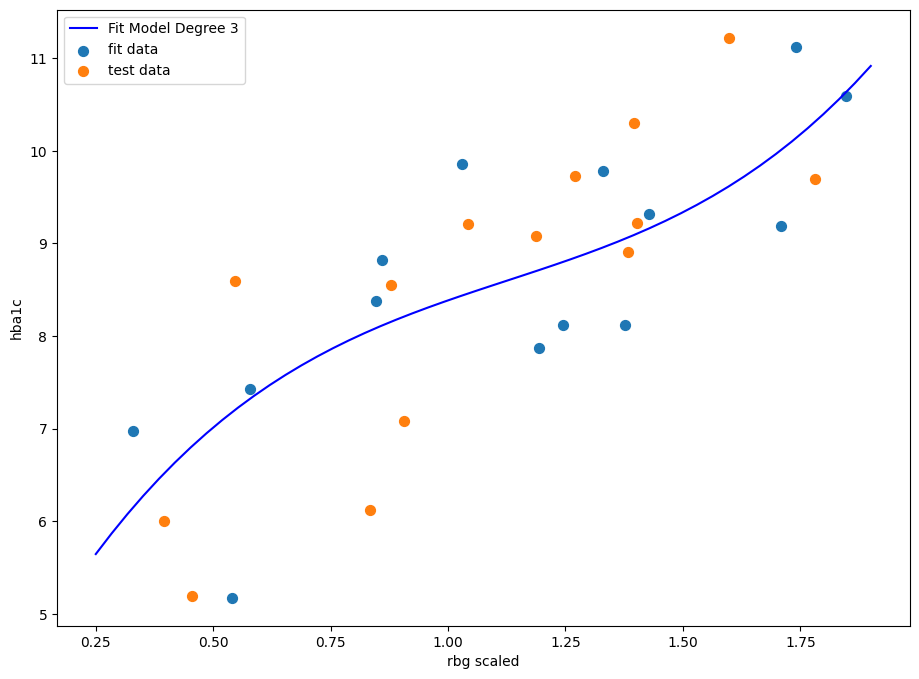

In [30]:
p3 = PolynomialFeatures(3)

fit_features = p3.fit_transform(data_fit[['rbg_scaled']])
fit_featurestest = p3.fit_transform(d_test[['rbg_scaled']])
# create linear model and fit it to design matrix (features) and values (Y)
linear_model = LinearRegression()
linear_model.fit(fit_features, data_fit['hba1c'])

# evaluate predictions on 100 tightly spaced points (in 0..1) in x
prediction_positions = np.linspace(0.25, 1.9, 50)
# create features of prediction points
prediction_features = p3.fit_transform(prediction_positions.reshape((-1, 1)))
# do prediction
predictions = linear_model.predict(prediction_features)
figsize = (11,8)
# plot data and prediction
fig, ax = plt.subplots(figsize=figsize)

ax.plot(prediction_positions, predictions, label='Fit Model Degree 3',
        color='blue')
ax.scatter(data_fit['rbg_scaled'], data_fit['hba1c'], s=50, label='fit data')
ax.scatter(d_test['rbg_scaled'], d_test['hba1c'], s=50, label='test data')
ax.set_xlabel('rbg scaled')
ax.set_ylabel('hba1c')
ax.legend()
fig.show()


#### Score for 3rd Degree

In [31]:
s = linear_model.score(fit_features, data_fit['hba1c'])
print("fit score:", s)
s2 = linear_model.score(fit_featurestest, d_test['hba1c'])
print("validation score:", s2)

fit score: 0.6237055025260223
validation score: 0.6012152949575463


###Linear Regression for 10th Degree

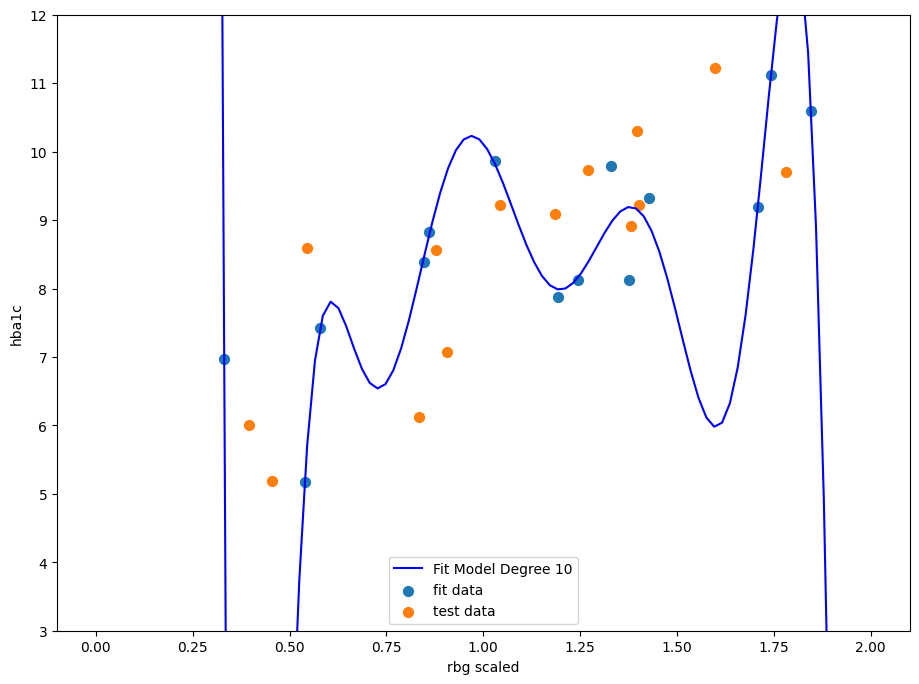

In [32]:
p10 = PolynomialFeatures(10)
fit_features10 = p10.fit_transform(data_fit[['rbg_scaled']])
fit_features10test = p10.fit_transform(d_test[['rbg_scaled']])

# create linear model and fit it to design matrix (features) and values (Y)
linear_model10 = LinearRegression()
model = linear_model10.fit(fit_features10, data_fit['hba1c'])

# evaluate predictions on 100 tightly spaced points (in 0..1) in x
prediction_positions = np.linspace(0, 2, 100)
# create features of prediction points
prediction_features = p10.fit_transform(prediction_positions.reshape((-1, 1)))
# do prediction
predictions = linear_model10.predict(prediction_features)
figsize = (11,8)
# plot data and prediction
fig, ax = plt.subplots(figsize=figsize)

ax.plot(prediction_positions, predictions, label='Fit Model Degree 10',
        color='blue')
ax.scatter(data_fit['rbg_scaled'], data_fit['hba1c'], s=50, label='fit data')

ax.scatter(d_test['rbg_scaled'], d_test['hba1c'], s=50, label='test data')
ax.set_xlabel('rbg scaled')
ax.set_ylabel('hba1c')
ax.set_ylim(bottom= 3, top=12)
ax.legend()
fig.show()

#### Score for 10th Degree

In [33]:
sfit = linear_model10.score(fit_features10, data_fit['hba1c'])
print("fit score:", sfit)
s2 = linear_model10.score(fit_features10test, d_test['hba1c'])
print("validation score:", s2)

fit score: 0.935141183766417
validation score: -22.39192482729845


### The model performs very well on the fitting data but it is unstable. The tenth degree overfits the fitting data. The score is less than optimal for the validation data. Degree 3 is a better fit model based on the score of the validation data.

# Homework 3


## Too low alpha
This alpha is too low because it overfits the fitting data.

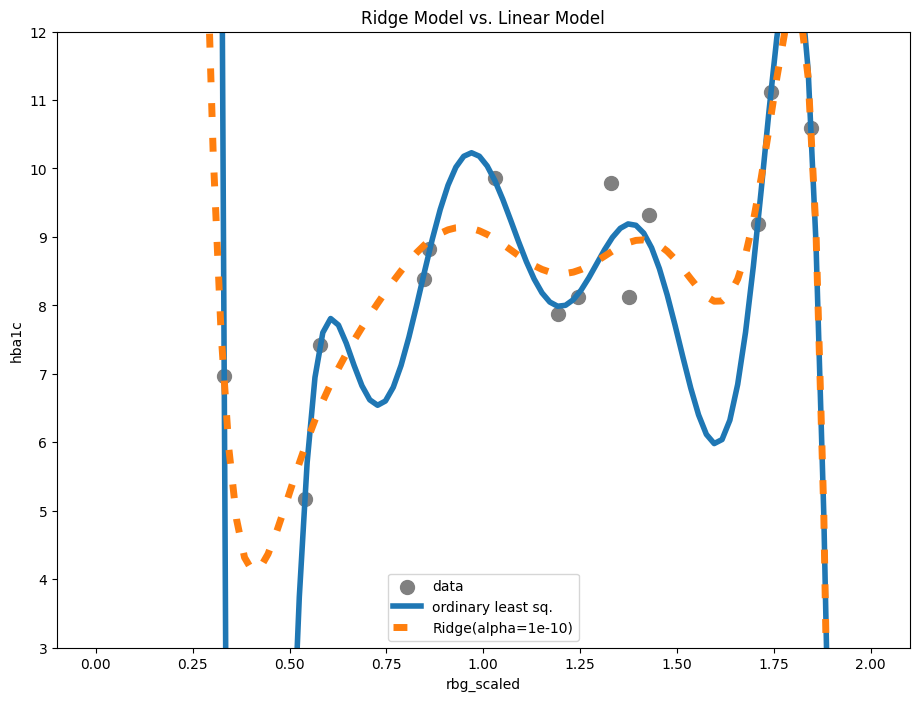

In [34]:
from sklearn.linear_model import Ridge

ridge_model = Ridge(1e-10)

ridge_model.fit(p10.fit_transform(data_fit[['rbg_scaled']]), data_fit['hba1c'])

from matplotlib import pyplot as plt
import numpy as np

predict_pts = np.linspace(0.0, 2.0, 100)
fig, ax = plt.subplots(figsize=figsize)
ax.scatter(data_fit['rbg_scaled'], data_fit['hba1c'], s=100, color='grey', label='data')
ax.plot(predict_pts, model.predict(p10.fit_transform(predict_pts.reshape((-1,1)))), lw=4, label='ordinary least sq.')
ax.plot(predict_pts, ridge_model.predict(p10.fit_transform(predict_pts.reshape((-1,1)))), '--', dashes=(2,3), lw=5, label= ridge_model)
ax.legend()
ax.set_xlabel("rbg_scaled")
ax.set_ylabel("hba1c")
ax.set_title('Ridge Model vs. Linear Model')
ax.set_ylim(bottom= 3, top=12)
fig.show()

### You cannot follow this ridge model; there are too many oscillations and the model has too much flexibility to the fitting data. This suggests that the alpha is too low.

## Too high alpha
  This alpha is too high because there is no visible trend and fails to fit the fitting data.

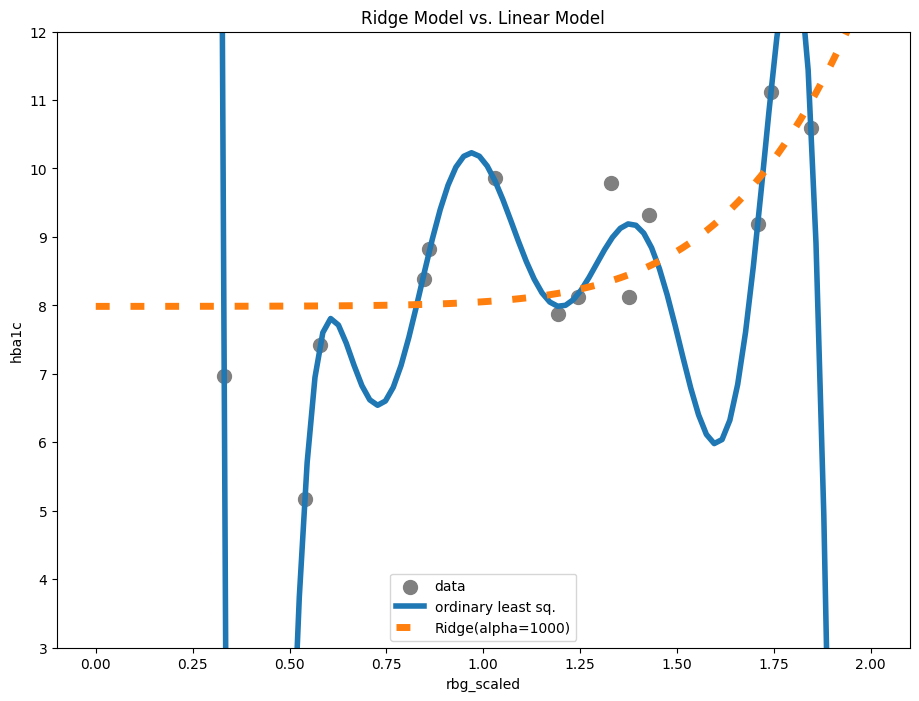

In [35]:
ridge_model = Ridge(1000)

ridge_model.fit(p10.fit_transform(data_fit[['rbg_scaled']]), data_fit['hba1c'])

from matplotlib import pyplot as plt
import numpy as np

predict_pts = np.linspace(0.0, 2.0, 100)
fig, ax = plt.subplots(figsize=figsize)
ax.scatter(data_fit['rbg_scaled'], data_fit['hba1c'], s=100, color='grey', label='data')
ax.plot(predict_pts, model.predict(p10.fit_transform(predict_pts.reshape((-1,1)))), lw=4, label='ordinary least sq.')
ax.plot(predict_pts, ridge_model.predict(p10.fit_transform(predict_pts.reshape((-1,1)))), '--', dashes=(2,3), lw=5, label= ridge_model)
ax.legend()
ax.set_xlabel("rbg_scaled")
ax.set_ylabel("hba1c")
ax.set_ylim(bottom= 3, top=12)
ax.set_title('Ridge Model vs. Linear Model')
fig.show()


## Just right alpha
  Value based on the R**2 by alpha scatter plot and score values for both fitting and validation data.

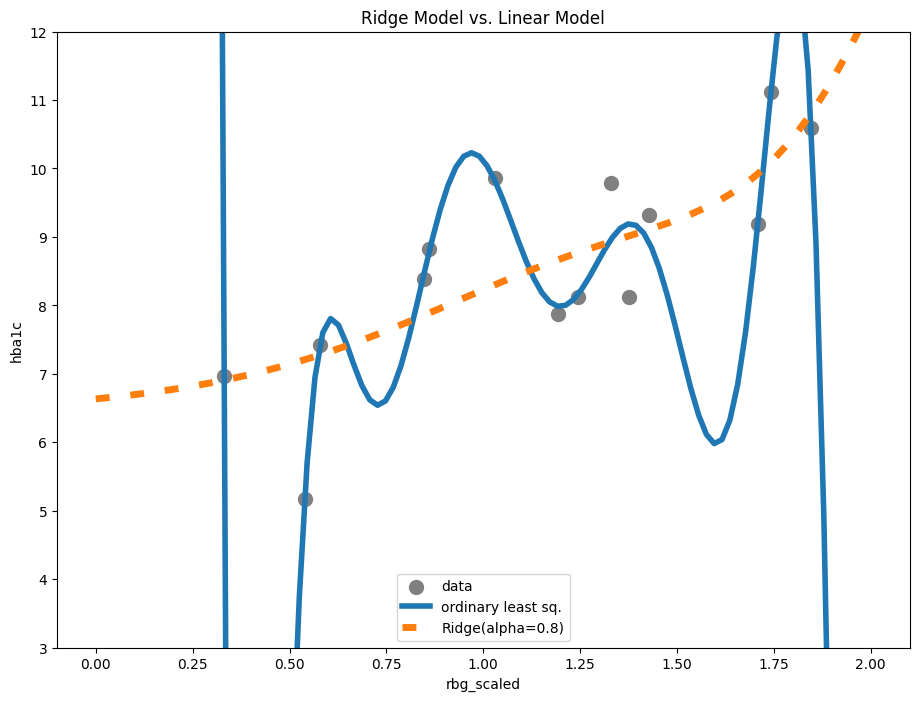

In [36]:
ridge_model = Ridge(0.8)

ridge_model.fit(p10.fit_transform(data_fit[['rbg_scaled']]), data_fit['hba1c'])

from matplotlib import pyplot as plt
import numpy as np

predict_pts = np.linspace(0.0, 2.0, 100)
fig, ax = plt.subplots(figsize=figsize)
ax.scatter(data_fit['rbg_scaled'], data_fit['hba1c'], s=100, color='grey', label='data')
ax.plot(predict_pts, model.predict(p10.fit_transform(predict_pts.reshape((-1,1)))), lw=4, label='ordinary least sq.')
ax.plot(predict_pts, ridge_model.predict(p10.fit_transform(predict_pts.reshape((-1,1)))), '--', dashes=(2,3), lw=5, label= ridge_model)
ax.legend()
ax.set_xlabel("rbg_scaled")
ax.set_ylabel("hba1c")
ax.set_title('Ridge Model vs. Linear Model')
ax.set_ylim(bottom= 3, top=12)
fig.show()

### Validate and calculate scores for fitting data and testing data

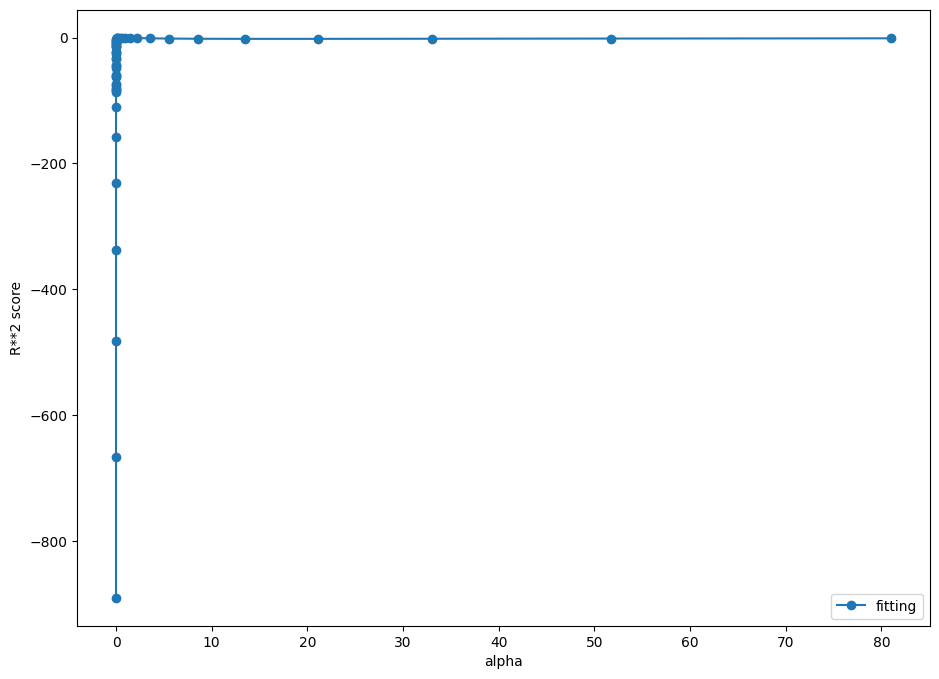

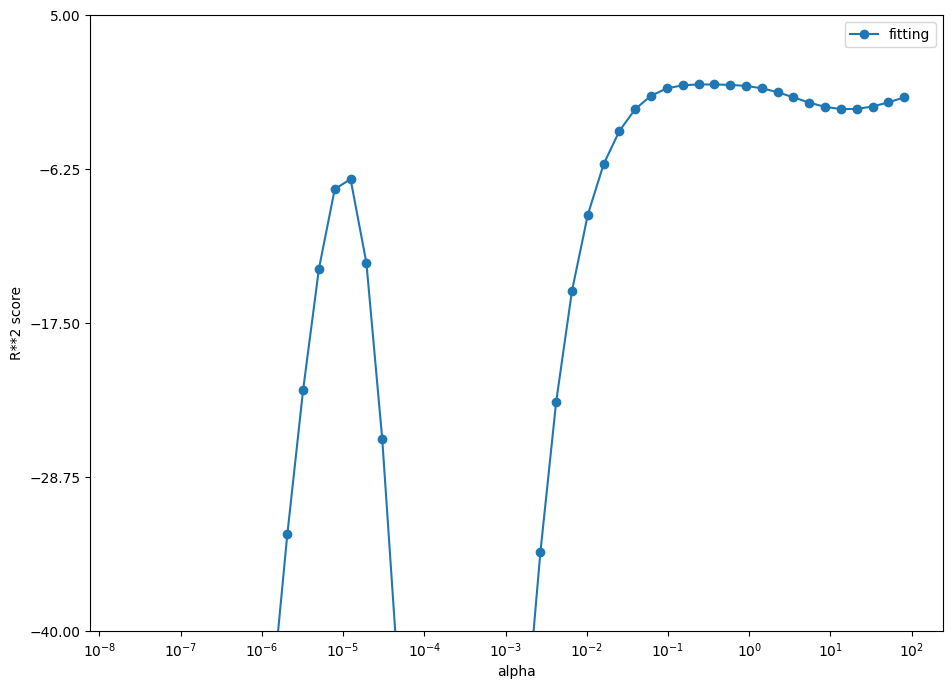

In [37]:
from sklearn.model_selection import cross_val_score

alphas = list(np.logspace(-16, 4, base=3))
scores = []
for alpha in alphas:
  model_ridge = Ridge(alpha)
  # 3-fold cross validation
  cv_score = cross_val_score(model_ridge, p10.fit_transform(data_fit[['rbg_scaled']]), data_fit['hba1c'], cv=3)
  #print(alpha, cv_score)
  scores.append(np.mean(cv_score))

fig, ax = plt.subplots(figsize=figsize)
ax.plot(alphas, scores, marker='o', label='fitting')
ax.set_xlabel('alpha')
ax.set_ylabel('R**2 score')
ax.legend()
fig.show()

fig, ax = plt.subplots(figsize=figsize)
ax.semilogx(alphas, scores, marker='o', label='fitting')

ax.set_xlabel('alpha')
ax.set_ylabel('R**2 score')
ax.legend()
ax.set_ylim(0,1)
ax.set_yticks(np.linspace(-40, 5, 5))
ax.set_xticks(np.logspace(-8, 2, 11, base=10))

fig.show()


In [38]:
ridge_model.fit(p10.fit_transform(data_fit[['rbg_scaled']]), data_fit['hba1c'])

fit_score = ridge_model.score(p10.fit_transform(data_fit[['rbg_scaled']]), data_fit['hba1c'])
test_score = ridge_model.score(p10.fit_transform(d_test[['rbg_scaled']]), d_test['hba1c'])

print("fit data:", fit_score, '\n', "test data:", test_score)

fit data: 0.6125680630112993 
 test data: 0.5677632076276244
